<a href="https://colab.research.google.com/github/bdowson/framework/blob/master/RealEstateWGU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USA Real Estate Prices


In [1]:
#@title
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the data from the CSV file
file_path = 'realtor-data.csv'
data = pd.read_csv(file_path)

# Preprocess the data by dropping irrelevant columns and handling missing values
data.drop(['status', 'city', 'state', 'zip_code', 'prev_sold_date', 'acre_lot'], axis=1, inplace=True)
data.dropna(inplace=True)

# Prepare the feature matrix (X) and target vector (y)
X = data.drop('price', axis=1)
y = data['price']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [2]:
# @title Descriptive Data
# Descriptive method
print(data.describe())

                bed          bath    house_size         price
count  53025.000000  53025.000000  5.302500e+04  5.302500e+04
mean       3.684696      2.434870  2.096719e+03  4.501231e+05
std        1.903306      1.501981  6.500704e+03  1.020482e+06
min        1.000000      1.000000  1.000000e+02  1.000000e+04
25%        3.000000      2.000000  1.160000e+03  1.499950e+05
50%        3.000000      2.000000  1.630000e+03  2.650000e+05
75%        4.000000      3.000000  2.462000e+03  4.350000e+05
max       40.000000     36.000000  1.450112e+06  6.000000e+07


In [5]:
# @title Non-descriptive Data
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 982774604100.1932
R2 Score: 0.15472174437982866


In [6]:
# @title Calculate predicted property price
def predict_property_price(model, bed, bath, house_size):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({'bed': [bed], 'bath': [bath], 'house_size': [house_size]})
    
    # Make a prediction using the trained model
    predicted_price = model.predict(input_data)
    
    return predicted_price[0]

beds = 1 #@param {type:"integer" }
baths = 2 #@param {type:"integer" }
sq_feet = 1000 #@param {type:"integer" }

predicted_price = predict_property_price(model, beds, baths, sq_feet)
print(f"The predicted price for the property is ${predicted_price:.2f}")

The predicted price for the property is $518079.17


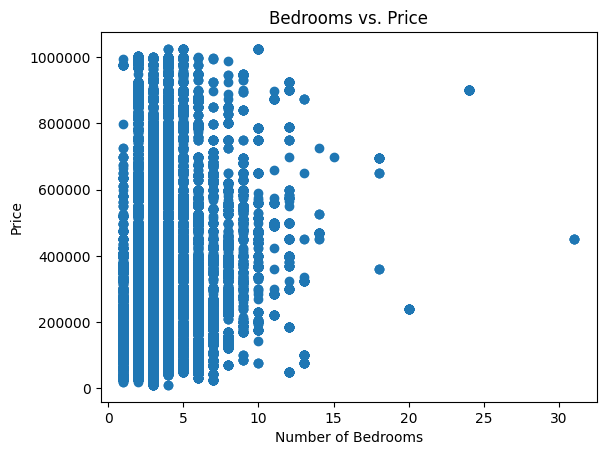

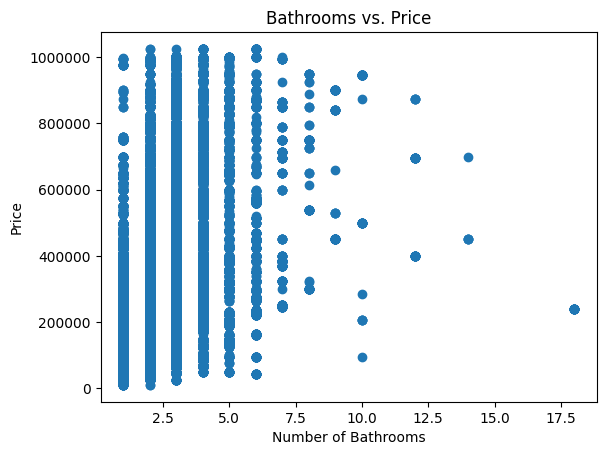

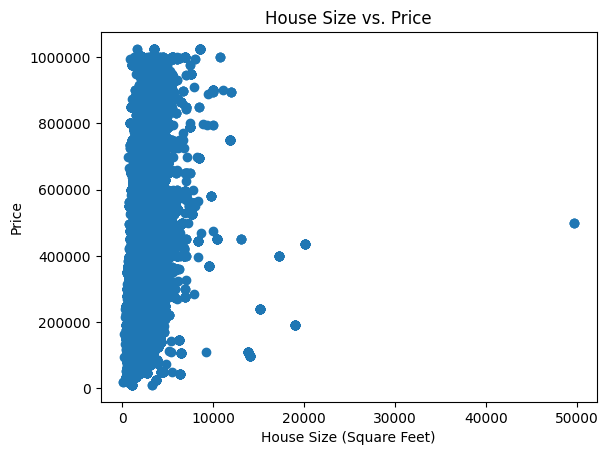

In [7]:
# @title Scatterplot graphs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def full_number(x, pos):
    return f"{x:.0f}"
formatter = ticker.FuncFormatter(full_number)

# Function to remove outliers based on the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the dataset
data_filtered = remove_outliers_iqr(data, 'price')

# Scatter plot for bedrooms vs. price
plt.scatter(data_filtered['bed'], data_filtered['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs. Price')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Scatter plot for bathrooms vs. price
plt.scatter(data_filtered['bath'], data_filtered['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Bathrooms vs. Price')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Scatter plot for house_size vs. price
plt.scatter(data_filtered['house_size'], data_filtered['price'])
plt.xlabel('House Size (Square Feet)')
plt.ylabel('Price')
plt.title('House Size vs. Price')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

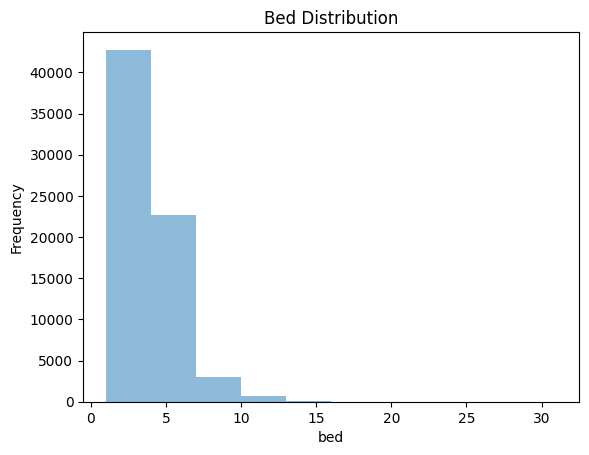

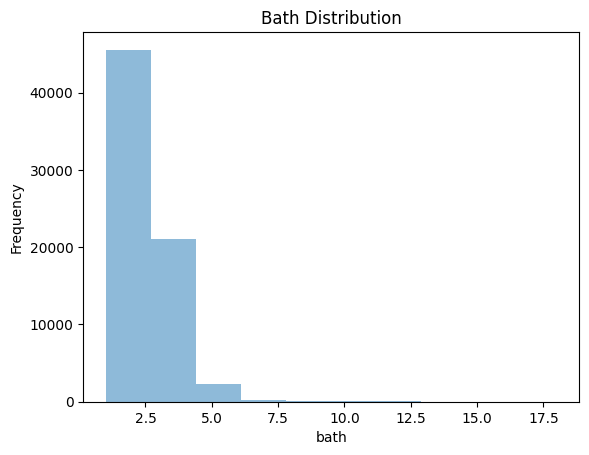

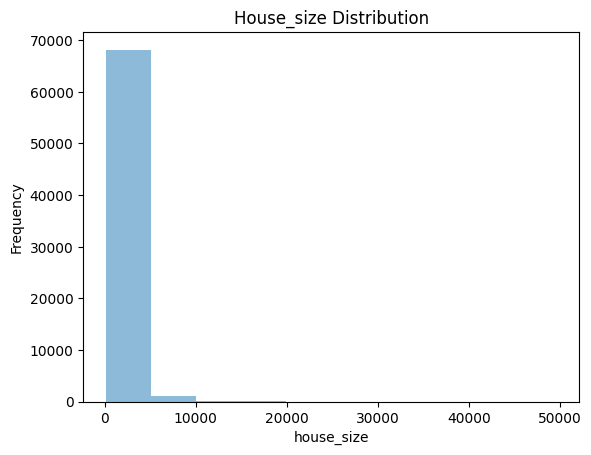

In [8]:
# @title Historgrams
import numpy as np

def full_number(x, pos):
    return f"{x:.0f}"
formatter = ticker.FuncFormatter(full_number)

# Function to remove outliers based on the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the dataset
data_filtered = remove_outliers_iqr(data, 'price')

for column in ['bed', 'bath', 'house_size']:
    plt.hist(data_filtered[column], bins=10, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column.capitalize()} Distribution')
    plt.show()

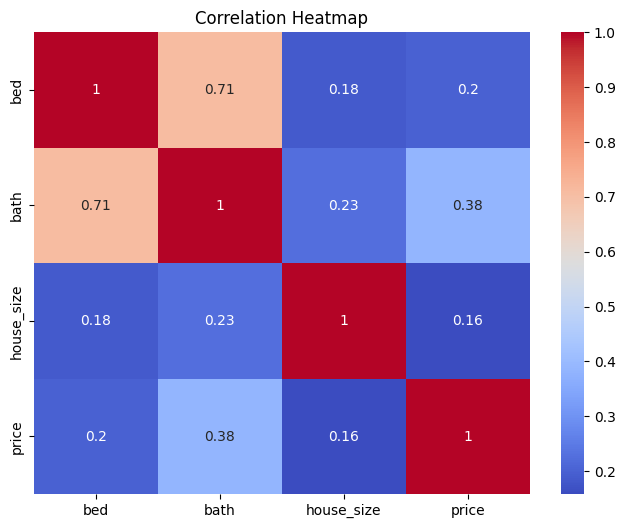

In [9]:
# @title Heatmap graph
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()